In [21]:
'''
Assignment 1: Linear Regression using Numpy (No deep learning/ automatic differentiation libraries are allowed)


Use Python2.7 environment
Roll No: 15CS30040
Name: Vishesh Agarwal

'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix seed for reproducibility
np.random.seed(100)

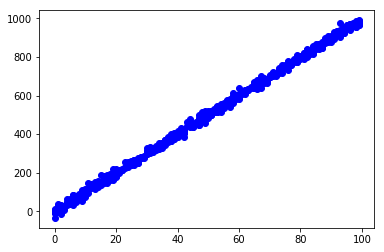

In [22]:
def generate_dataset():
    '''
    Function to generate the dataset for our problem
    Args:
        None
    Return:
        X: 
    '''
    N = 600
    X = np.random.randint(100, size=N)
    e = np.random.normal(0., 12., N)
    y = 10*X + e #Note the use of broadcasting here
    
    return X, y

X, y = generate_dataset()
# Now lets visualize our data
plt.plot(X, y, 'bo')
plt.show()

# get N
N = len(X)

# shuffle the dataset randomly
# X, y contains the data after shuffling randomly X and y
randperm = np.random.permutation(N)
X, y = X[randperm], y[randperm]

# Created train and test set
training_size = int(0.8*N)

X_train = X[:training_size]
y_train = y[:training_size]
X_test = X[training_size:]
y_test = y[training_size:]


Starting Training with Gradient Descent
Loss fuction decrease after 10000 epochs of training


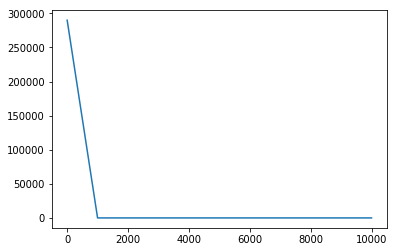

In [23]:
class LinearRegression(object):
    def __init__(self):
        #Initialize all parameters
        self.w = np.random.uniform(-1, 1) # Sample from a uniform distribution between -1 and 1
        self.b = np.random.uniform(-1, 1) # Sample from a uniform distribution between -1 and 1
    
    def forward(self, x):
        '''
            Do a forward pass of the classifier:
            Args:
                x: Input X value
            Return:
                y: y = wx + b
        '''
        # Complete this function
        y = self.w * x + self.b
        return y
        
    
    def backward(self, x, ypred, y_train, lr):
        '''
            Computes all gradients and updates the parameters w and b
            Args:
                x : x
                ypred: y=wx+b
                y_train = ground truth values
                lr = learning rate
        '''
        w_grad = 2 * np.average(x * (ypred - y_train)) # Compute derivate of loss wrt w 
        b_grad = 2 * np.average(ypred - y_train) # Compute derivate of loss wrt w
        self.w = self.w - lr*w_grad # Updating w
        self.b = self.b - lr*b_grad # Updating b

def MSELoss(y, ypred):
    '''
        Args:
            y: ground truth labels
            ypred: predicted labels
        Return:
            Mean squared error loss
    '''
    # Complete this function
    return np.average((ypred - y)**2)


print 'Starting Training with Gradient Descent'
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.00001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train)
    loss = MSELoss(y_train, ypred)
    if e==0 or (e+1)%1000==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
    
    lreg.backward(X_train, ypred, y_train, learning_rate)

print 'Loss fuction decrease after ' + str(epochs) + ' epochs of training'

#Plot the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()



In [25]:
print 'Final Training loss: ' + str(loss)  # Print training loss
print 'Starting to test'
ypred =  lreg.forward(X_test) # find predictions on test set
loss = MSELoss(y_test, ypred) # compute loss on test set
print 'Final test loss: ' + str(loss)

Final Training loss: 139.990942528
Starting to test
Final test loss: 139.990942528


Visualizing learnt function on test data


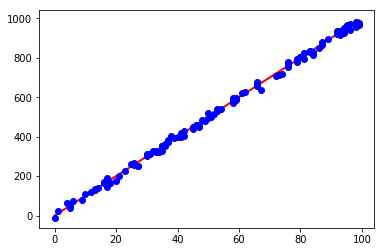

In [26]:
print 'Visualizing learnt function on test data'

x_ = np.arange(100)
y_ = lreg.w*x_ + lreg.b

plt.plot(x_, y_, 'r-', linewidth=2.0)
plt.plot(X_test, y_test, 'bo')
plt.show()